In [2]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accrual_basis_payments = pd.read_csv('../files/accrual_basis_payments.csv', encoding='utf-8', sep=';')
cash_flow_payments = pd.read_csv('../files/cash_flow_payments.csv', encoding='utf-8', sep=';')

users_subscriptions = pd.read_csv('../files/users_subscriptions.csv', encoding='utf-8', sep=';')
dim_calendar = pd.read_csv('../files/dim_calendar.csv', encoding='utf-8')

# What is the total revenue generated by the app over the past one month?

### CashFlow revenue
Here we see the revenue data from a cashflow perspective, that is, for the yearly subscriptions, all subscription value is set on the subscription_start_at date.

In [9]:
qry = """
    SELECT 
        LEFT(payment_date, 7) AS payment_month
        , subscription_type
        , SUM(payment_value) AS revenue
    FROM
        cash_flow_payments
    GROUP BY
        LEFT(payment_date, 7)
        , subscription_type
"""

cashflow_monthly_revenue_data = duckdb.query(qry).df()
cashflow_monthly_revenue_data = cashflow_monthly_revenue_data.sort_values('payment_month', ascending=True)


cashflow_monthly_revenue_data.tail()

,payment_month,subscription_type,revenue
40,2023-10,Yearly,20074.18
44,2023-11,Yearly,19675.32
6,2023-11,Monthly,12529.43
26,2023-12,Monthly,5937.37
41,2023-12,Yearly,6269.20


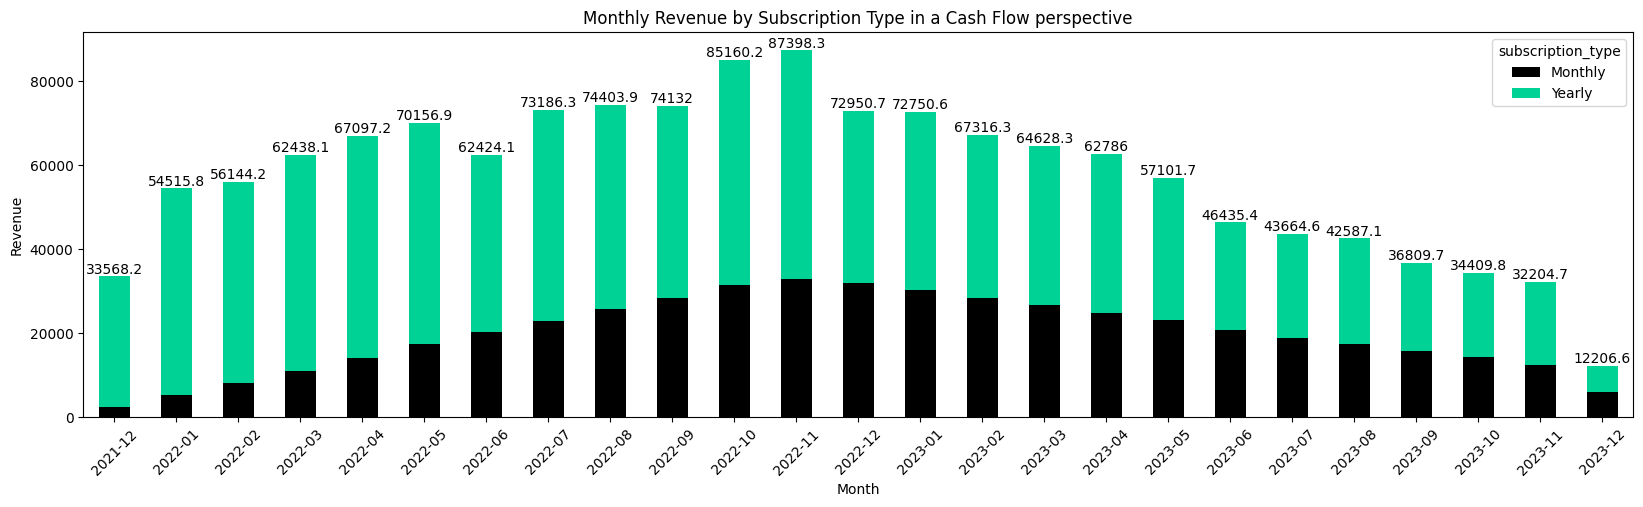

In [7]:
pivot_df = cashflow_monthly_revenue_data.pivot_table(values='revenue', index='payment_month', columns='subscription_type', aggfunc='sum')


ax = pivot_df.plot(kind='bar', 
                   stacked=True, 
                   color=['#000000', '#00D296'])


container = ax.containers[1]
ax.bar_label(container, label_type='edge', color='black')

ax.figure.set_size_inches(20, 5)
plt.title('Monthly Revenue by Subscription Type in a Cash Flow perspective')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.show()

### Revenue by accrual basis
Here we look at revenue data on an accrual basis, that is, for annual subscriptions, the subscription value is recognized as the customer uses the application, and it stops when the subscription has been canceled

In [6]:
qry = """
    SELECT 
        LEFT(payment_date, 7) AS payment_month
        , subscription_type
        , SUM(payment_value) AS revenue
    FROM
        accrual_basis_payments
    GROUP BY
        LEFT(payment_date, 7)
        , subscription_type
"""

monthly_revenue_data = duckdb.query(qry).df()
monthly_revenue_data = monthly_revenue_data.sort_values('payment_month', ascending=True)


monthly_revenue_data.tail()

,payment_month,subscription_type,revenue
24,2023-10,Yearly,19313.175000
18,2023-11,Monthly,12529.430000
10,2023-11,Yearly,16749.390000
25,2023-12,Yearly,8313.456667
49,2023-12,Monthly,5937.370000


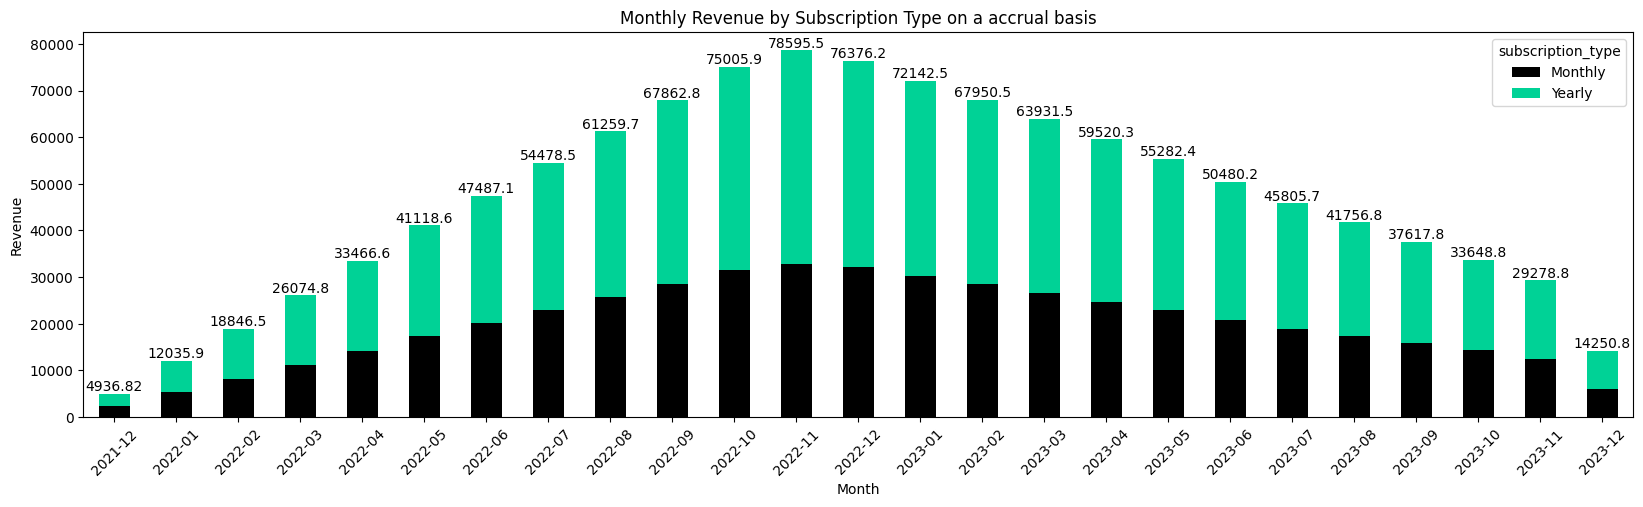

In [7]:
pivot_df = monthly_revenue_data.pivot_table(values='revenue', index='payment_month', columns='subscription_type', aggfunc='sum')


ax = pivot_df.plot(kind='bar', 
                   stacked=True, 
                   color=['#000000', '#00D296'])


container = ax.containers[1]
ax.bar_label(container, label_type='edge', color='black')

ax.figure.set_size_inches(20, 5)
plt.title('Monthly Revenue by Subscription Type on a accrual basis')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.show()

# Final Answer:


The last month's total revenue by the cashflow was €32,204.70. 

If we look at the data on using accrual basis, where annual revenue amounts are recognized as the customer uses the app, last month's total revenue was €29,278.80.